In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
full_df = pd.read_csv('titanic.csv')

In [4]:
print(full_df.shape)

(891, 12)


In [5]:
full_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
full_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
full_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replace missing values for Age & Fare with median

In [8]:
full_df['Age'].fillna(value=int(full_df['Age'].median(skipna=True)), inplace=True)
full_df['Fare'].fillna(value=int(full_df['Fare'].median(skipna=True)), inplace=True)

In [10]:
print('Missing value proportion of Cabin column:', full_df['Cabin'].isnull().sum()/full_df.shape[0])

Missing value proportion of Cabin column: 0.771043771044


77% of the values are missing in this column. So dropping this column

In [11]:
full_df.drop('Cabin', axis=1, inplace=True)

Replace missing values in Embarked column with mode

In [12]:
full_df['Embarked'].fillna(value=full_df['Embarked'].mode()[0], inplace=True)

Check again missing values after imputation

In [13]:
full_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
full_df['PassengerId'].value_counts()

891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
305    1
307    1
279    1
321    1
      ..
561    1
560    1
584    1
585    1
586    1
587    1
610    1
609    1
608    1
607    1
606    1
605    1
604    1
603    1
602    1
601    1
600    1
599    1
598    1
597    1
596    1
595    1
594    1
593    1
592    1
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

In [15]:
full_df['Name'].value_counts()

McKane, Mr. Peter David                                      1
Murphy, Miss. Margaret Jane                                  1
Christy, Miss. Julie Rachel                                  1
Widener, Mr. Harry Elkins                                    1
Stoytcheff, Mr. Ilia                                         1
Gheorgheff, Mr. Stanio                                       1
Rosblom, Mrs. Viktor (Helena Wilhelmina)                     1
Abelson, Mr. Samuel                                          1
Rouse, Mr. Richard Henry                                     1
Van der hoef, Mr. Wyckoff                                    1
Clifford, Mr. George Quincy                                  1
Fox, Mr. Stanley Hubert                                      1
Karlsson, Mr. Nils August                                    1
Bryhl, Mr. Kurt Arnold Gottfrid                              1
Sedgwick, Mr. Charles Frederick Waddington                   1
Petterson, Mr. Johan Emil                              

In [16]:
full_df['Ticket'].value_counts()

1601                  7
347082                7
CA. 2343              7
3101295               6
347088                6
CA 2144               6
382652                5
S.O.C. 14879          5
W./C. 6608            4
113760                4
PC 17757              4
4133                  4
347077                4
17421                 4
19950                 4
349909                4
113781                4
2666                  4
LINE                  4
PC 17582              3
13502                 3
C.A. 31921            3
PC 17755              3
35273                 3
C.A. 34651            3
24160                 3
110413                3
347742                3
248727                3
PC 17572              3
                     ..
239854                1
19952                 1
A/4. 34244            1
113784                1
SC/PARIS 2146         1
STON/O2. 3101271      1
7553                  1
392092                1
SOTON/O.Q. 3101311    1
370375                1
F.C. 12750      

PassengerId, Name and Ticket columns are either unique or very rarely repeated. So, these columns can't be used in model

In [16]:
full_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

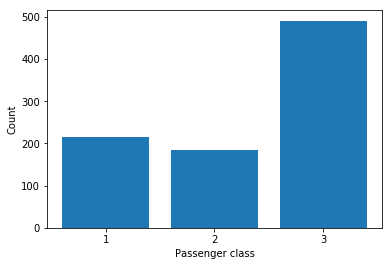

In [17]:
pclass_group=full_df.groupby('Pclass').count()['PassengerId']
plt.bar(pclass_group.index,pclass_group.values)
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.xticks(pclass_group.index)
plt.show()

Convert categorical/discrete variables to one hot encoding

In [18]:
full_df = pd.concat([full_df, pd.get_dummies(full_df['Pclass'], prefix='Pclass', drop_first=True)], axis=1)

In [19]:
full_df = pd.concat([full_df, pd.get_dummies(full_df['Sex'], prefix='Sex', drop_first=True)], axis=1)

In [20]:
full_df = pd.concat([full_df, pd.get_dummies(full_df['Embarked'], prefix='Embarked', drop_first=True)], axis=1)

In [21]:
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1


Create a list of useful columns excluding redundant columns

In [22]:
feature_cols=[col_name for col_name in full_df.columns.values if col_name not in ['PassengerId',
 'Pclass', 'Name', 'Sex','Ticket','Embarked','test_flag','Survived']]
target_col='Survived'

Spilt full_df into train and test after preprocessing

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(full_df[feature_cols], full_df[target_col], test_size=0.1, random_state=100)

In [24]:
print(X_train.shape)
print(X_test.shape)

(801, 9)
(90, 9)


In [26]:
import statsmodels.api as sm
X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)
logistic_regression = sm.Logit(y_train,X_train_c)
fitted_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.432985
         Iterations 6


In [27]:
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.349     
Dependent Variable: Survived         AIC:              713.6416  
Date:               2018-08-14 15:35 BIC:              760.5002  
No. Observations:   801              Log-Likelihood:   -346.82   
Df Model:           9                LL-Null:          -532.70   
Df Residuals:       791              LLR p-value:      1.4385e-74
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         4.1011    0.5011    8.1837  0.0000   3.1189   5.0834
Age          -0.0397    0.0084   -4.7407  0.0000  -0.0561  -0.0233
SibSp        -0.3165    0.1146   -2.7611  0.0058  -0.5412  -0.0918
Parch        -0.0927    0.1270   -0.7298  0.4655  -0.3415   0.1562
Fare          0.0028    0.0026    1.0757  0.2821  -0.0023   0.0080
Pclass_2     -0.8115    0.3146   -2.5800  0.0099  -1.4281  -0.1950
Pclass_3     -2.1267    0.3159   -6.7329  0.0000  -2.7458  -1.5076
Sex_male     -2.8139    0.2155  -13.0577  0.0000  -3.2363  -2.3916
Embarked_Q    0.0142    0.4013    0.0353  0.9719  -0.7723   0.8006
Embarked_S   -0.4770    0.2509   -1.9015  0.0572  -0.9688   0.0147
=================================================================

"""

In [28]:
train_pred_probs = fitted_model.predict(X_train_c)
train_preds = train_pred_probs>0.5
test_pred_probs = fitted_model.predict(X_test_c)
test_preds = test_pred_probs>0.5

In [29]:
from sklearn.metrics import confusion_matrix
print('Train predictions confusion matrix:')
confusion_matrix(y_train, train_preds)

Train predictions confusion matrix:


array([[430,  65],
       [ 89, 217]], dtype=int64)

In [30]:
print('Test predictions confusion matrix:')
confusion_matrix(y_test, test_preds)

Test predictions confusion matrix:


array([[47,  7],
       [14, 22]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_preds))

             precision    recall  f1-score   support

          0       0.77      0.87      0.82        54
          1       0.76      0.61      0.68        36

avg / total       0.77      0.77      0.76        90

